## Feature Selection

#### 1. Dropping constant features - Removing constant features which are not important in solving this problem

In [2]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'A':[1,2,4,1,2,4],
                  'B':[4,5,6,7,8,9],
                  'C':[0,0,0,0,0,0],
                  'D':[1,1,1,1,1,1]})
df

,A,B,C,D
0,1,4,0,1
1,2,5,0,1
2,4,6,0,1
3,1,7,0,1
4,2,8,0,1
5,4,9,0,1


#### Variance Threshold - Removes all low variance features

In [3]:
from sklearn.feature_selection import VarianceThreshold
#It will remove feture with zero variance
var_thres = VarianceThreshold(threshold=0.0)
var_thres.fit(df)

VarianceThreshold()

In [4]:
var_thres.get_support()

array([ True,  True, False, False])

In [5]:
constant_columns = [column for column in df.columns if column not in df.columns[var_thres.get_support()]]
constant_columns

['C', 'D']

In [6]:
for feature in constant_columns:
    print(feature)

C
D


In [7]:
df.drop(constant_columns, axis=1, inplace=True)
df.head()

,A,B
0,1,4
1,2,5
2,4,6
3,1,7
4,2,8


#### 2.Feature Selection with correlation

In [8]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
data = load_boston()
df = pd.DataFrame(data =data.data, columns=data.feature_names)
df['MEDV'] = data.target

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [11]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [12]:
x = df.drop('MEDV', axis=1)
y = df.MEDV

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=3)
x_train.shape, x_test.shape

((354, 13), (152, 13))

<AxesSubplot:>

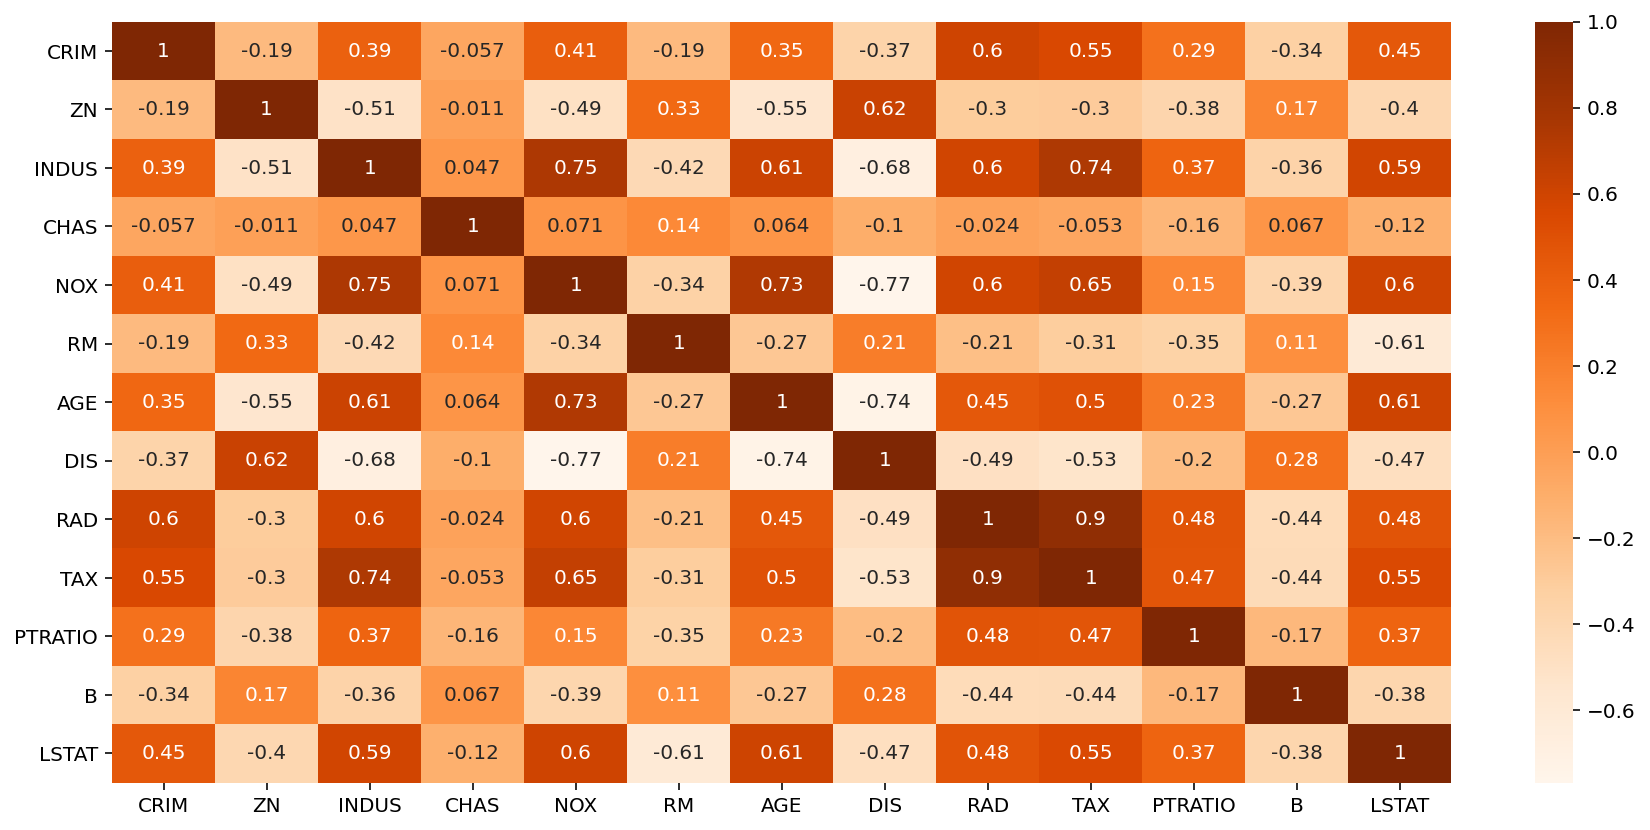

In [14]:
import seaborn as sns
plt.figure(figsize= (15,7))
corr = x_train.corr()
sns.heatmap(corr, annot=True, cmap= plt.cm.Oranges)

In [15]:
def correlation(dataset, threshold):
    corr_data = dataset.corr()
    corr_columns = set()
    for i in range(len(corr_data.columns)):
        for j in range(i):
            if (corr_data.iloc[i,j])> threshold:
                column = corr_data.columns[i]
                corr_columns.add(column)
    return corr_columns

In [16]:
corr_columns = correlation(x_train,0.7)
corr_columns

{'AGE', 'NOX', 'TAX'}

In [17]:
x_train.drop(corr_columns, axis=1)
x_test.drop(corr_columns, axis=1)

,CRIM,ZN,INDUS,CHAS,RM,DIS,RAD,PTRATIO,B,LSTAT
224,0.31533,0.0,6.20,0.0,8.266,2.8944,8.0,17.4,385.05,4.14
137,0.35233,0.0,21.89,0.0,6.454,1.8498,4.0,21.2,394.08,14.59
453,8.24809,0.0,18.10,0.0,7.393,2.4527,24.0,20.2,375.87,16.74
303,0.10000,34.0,6.09,0.0,6.982,5.4917,7.0,16.1,390.43,4.86
254,0.04819,80.0,3.64,0.0,6.108,9.2203,1.0,16.4,392.89,6.57
...,...,...,...,...,...,...,...,...,...,...
185,0.06047,0.0,2.46,0.0,6.153,3.2797,3.0,17.8,387.11,13.15
128,0.32543,0.0,21.89,0.0,6.431,1.8125,4.0,21.2,396.90,15.39
469,13.07510,0.0,18.10,0.0,5.713,2.8237,24.0,20.2,396.90,14.76
123,0.15038,0.0,25.65,0.0,5.856,1.9444,2.0,19.1,370.31,25.41


### 3.Feature Selection on Information Gain

##### Mutual Information (MI) between two random variables is a non-negative value, which measures the dependency between the variables.
##### It is zero when two random variables are independent & higher value means higher dependency

In [18]:
import pandas as pd
import numpy as np

df = pd.read_csv('wine')
df.tail()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [19]:
df.Wine.unique()

array([1, 2, 3])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('Wine', axis=1), df['Wine'], test_size=0.3, random_state=3)

In [22]:
x_train.shape, x_test.shape

((124, 13), (54, 13))

In [23]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(x_train,y_train)
mutual_info

array([0.47190768, 0.32258252, 0.05108999, 0.27432153, 0.14883719,
       0.40696949, 0.69586648, 0.13584967, 0.29220577, 0.57888297,
       0.42554868, 0.47239376, 0.54377631])

In [24]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending= False)

Flavanoids              0.695866
Color.int               0.578883
Proline                 0.543776
OD                      0.472394
Alcohol                 0.471908
Hue                     0.425549
Phenols                 0.406969
Malic.acid              0.322583
Proanth                 0.292206
Acl                     0.274322
Mg                      0.148837
Nonflavanoid.phenols    0.135850
Ash                     0.051090
dtype: float64

<AxesSubplot:>

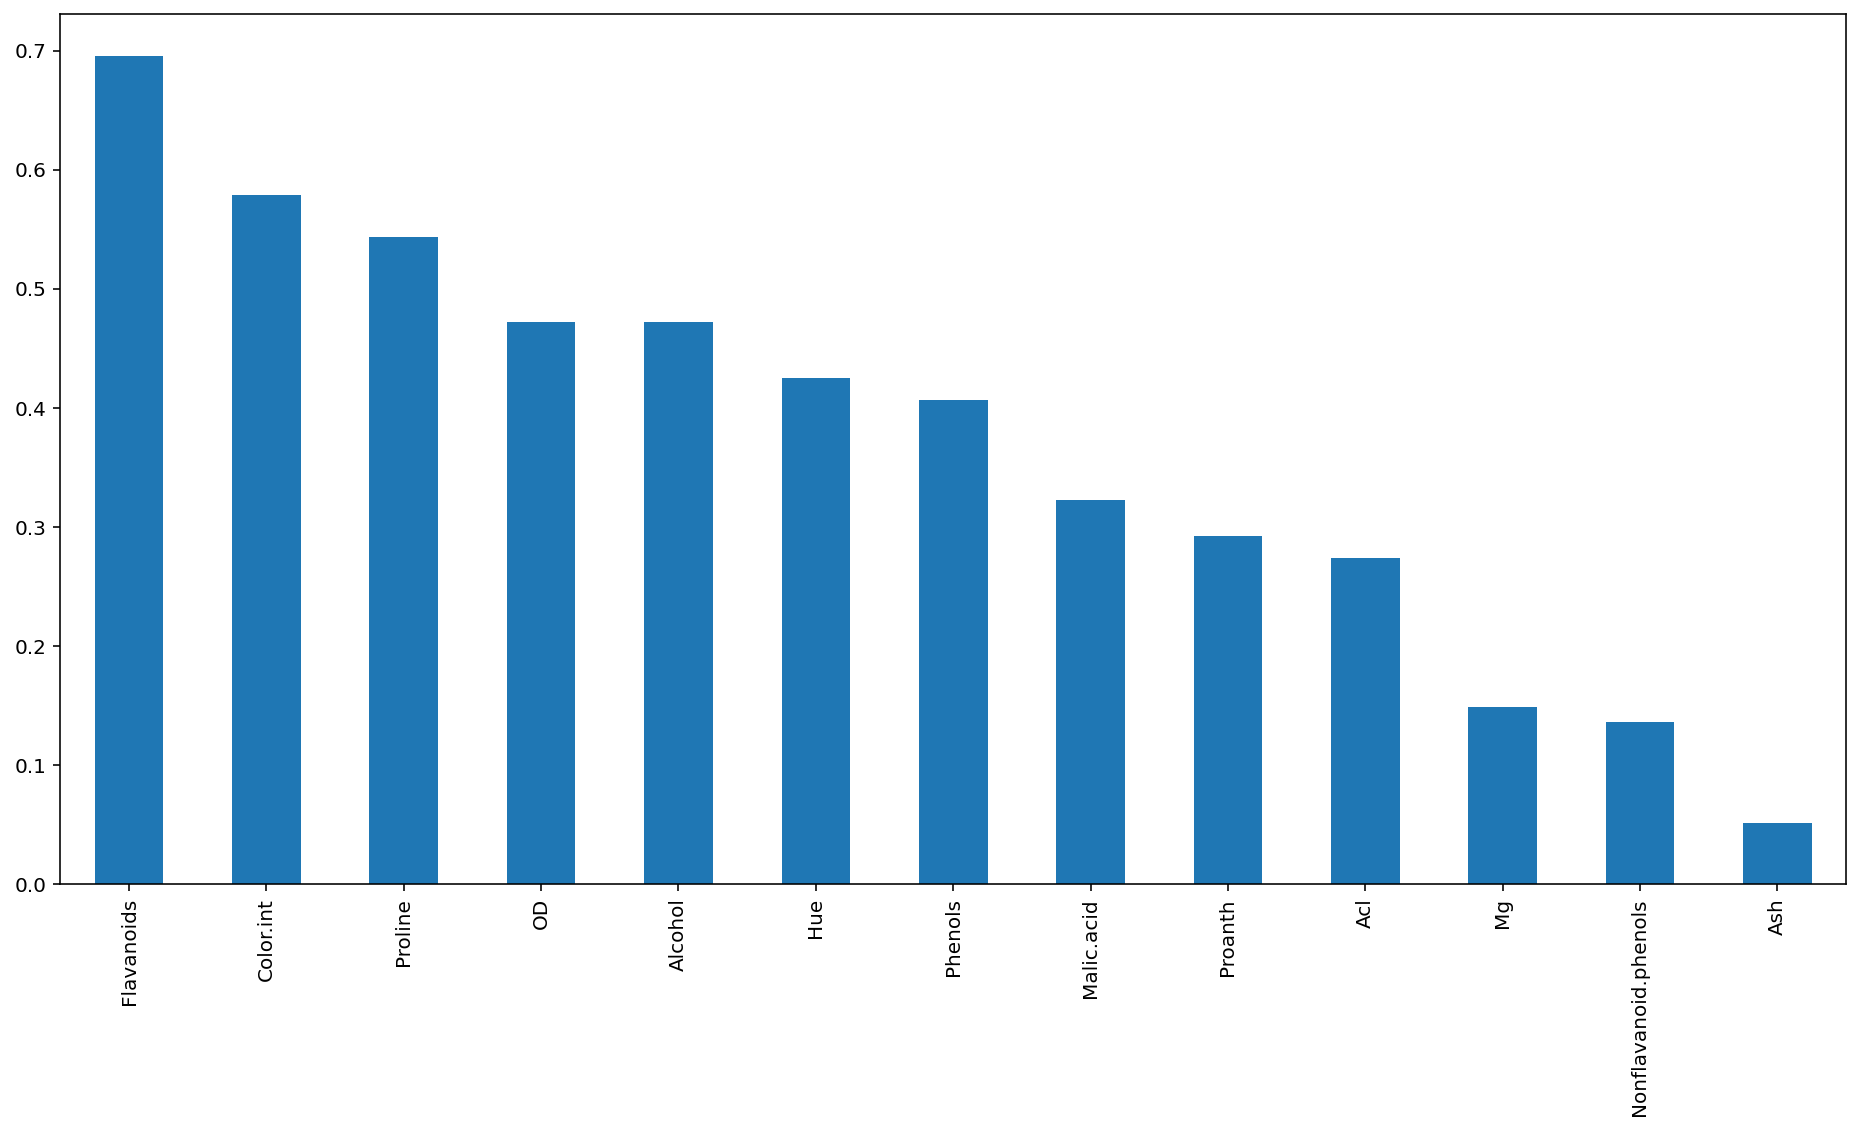

In [25]:
mutual_info.sort_values(ascending= False).plot.bar(figsize=(16,8))

In [26]:
from sklearn.feature_selection import SelectKBest
sel_five_col = SelectKBest(mutual_info_classif, k=5)
sel_five_col.fit(x_train, y_train)
x_train.columns[sel_five_col.get_support()]

Index(['Alcohol', 'Flavanoids', 'Color.int', 'OD', 'Proline'], dtype='object')

#### Difference between Information Gain & Mutual Information
#### I(X:Y) = H(X) - H(X|Y) & IF(S,a) = H(S) - H(S|a)

In [27]:
df = pd.read_csv('housing_price.csv')
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [28]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [30]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [31]:
numeric_list = ['int16','int32','int64','float32','float64']
numeric_cols=list(df.select_dtypes(include = numeric_list).columns)

In [32]:
df = df[numeric_cols]

In [33]:
df.drop('Id',axis=1,inplace=True)

In [34]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [35]:
def data_split(df,split_ratio):
    cond = np.random.rand(len(df))>split_ratio
    train = np.where(cond)[0]
    test = np.where(~cond)[0]
    df_train = df.iloc[train]
    df_test = df.iloc[test]
    x_train = df_train.drop('SalePrice', axis=1)
    y_train = df_train.SalePrice
    x_test = df_test.drop('SalePrice', axis=1)
    y_test = df_test.SalePrice
    return x_train,x_test,y_train,y_test

In [36]:
x_train,x_test,y_train,y_test = data_split(df,0.3)
len(x_train), len(x_test)

(1020, 440)

In [37]:
x_train.isna().sum()

MSSubClass         0
LotFrontage      180
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         5
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       55
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [38]:
from sklearn.feature_selection import mutual_info_regression
mutual_reg = mutual_info_regression(x_train.fillna(0), y_train)
mutual_reg

array([0.26987239, 0.18667511, 0.16164565, 0.57175257, 0.11011119,
       0.38338623, 0.24813137, 0.10474829, 0.14352322, 0.00800013,
       0.13189813, 0.3613112 , 0.28164977, 0.19836389, 0.        ,
       0.46685196, 0.01451538, 0.00806055, 0.25711281, 0.05528017,
       0.09705556, 0.02048344, 0.21326792, 0.18465121, 0.29205518,
       0.36913938, 0.38310896, 0.09114471, 0.11539538, 0.02557398,
       0.        , 0.01679541, 0.        , 0.        , 0.        ,
       0.01297852])

In [39]:
mutual_reg = pd.Series(mutual_reg)
mutual_reg.index = x_train.columns
mutual_reg.sort_values(ascending= False)

OverallQual      0.571753
GrLivArea        0.466852
YearBuilt        0.383386
GarageArea       0.383109
GarageCars       0.369139
TotalBsmtSF      0.361311
GarageYrBlt      0.292055
1stFlrSF         0.281650
MSSubClass       0.269872
FullBath         0.257113
YearRemodAdd     0.248131
TotRmsAbvGrd     0.213268
2ndFlrSF         0.198364
LotFrontage      0.186675
Fireplaces       0.184651
LotArea          0.161646
BsmtFinSF1       0.143523
BsmtUnfSF        0.131898
OpenPorchSF      0.115395
OverallCond      0.110111
MasVnrArea       0.104748
BedroomAbvGr     0.097056
WoodDeckSF       0.091145
HalfBath         0.055280
EnclosedPorch    0.025574
KitchenAbvGr     0.020483
ScreenPorch      0.016795
BsmtFullBath     0.014515
YrSold           0.012979
BsmtHalfBath     0.008061
BsmtFinSF2       0.008000
LowQualFinSF     0.000000
3SsnPorch        0.000000
PoolArea         0.000000
MiscVal          0.000000
MoSold           0.000000
dtype: float64

<AxesSubplot:>

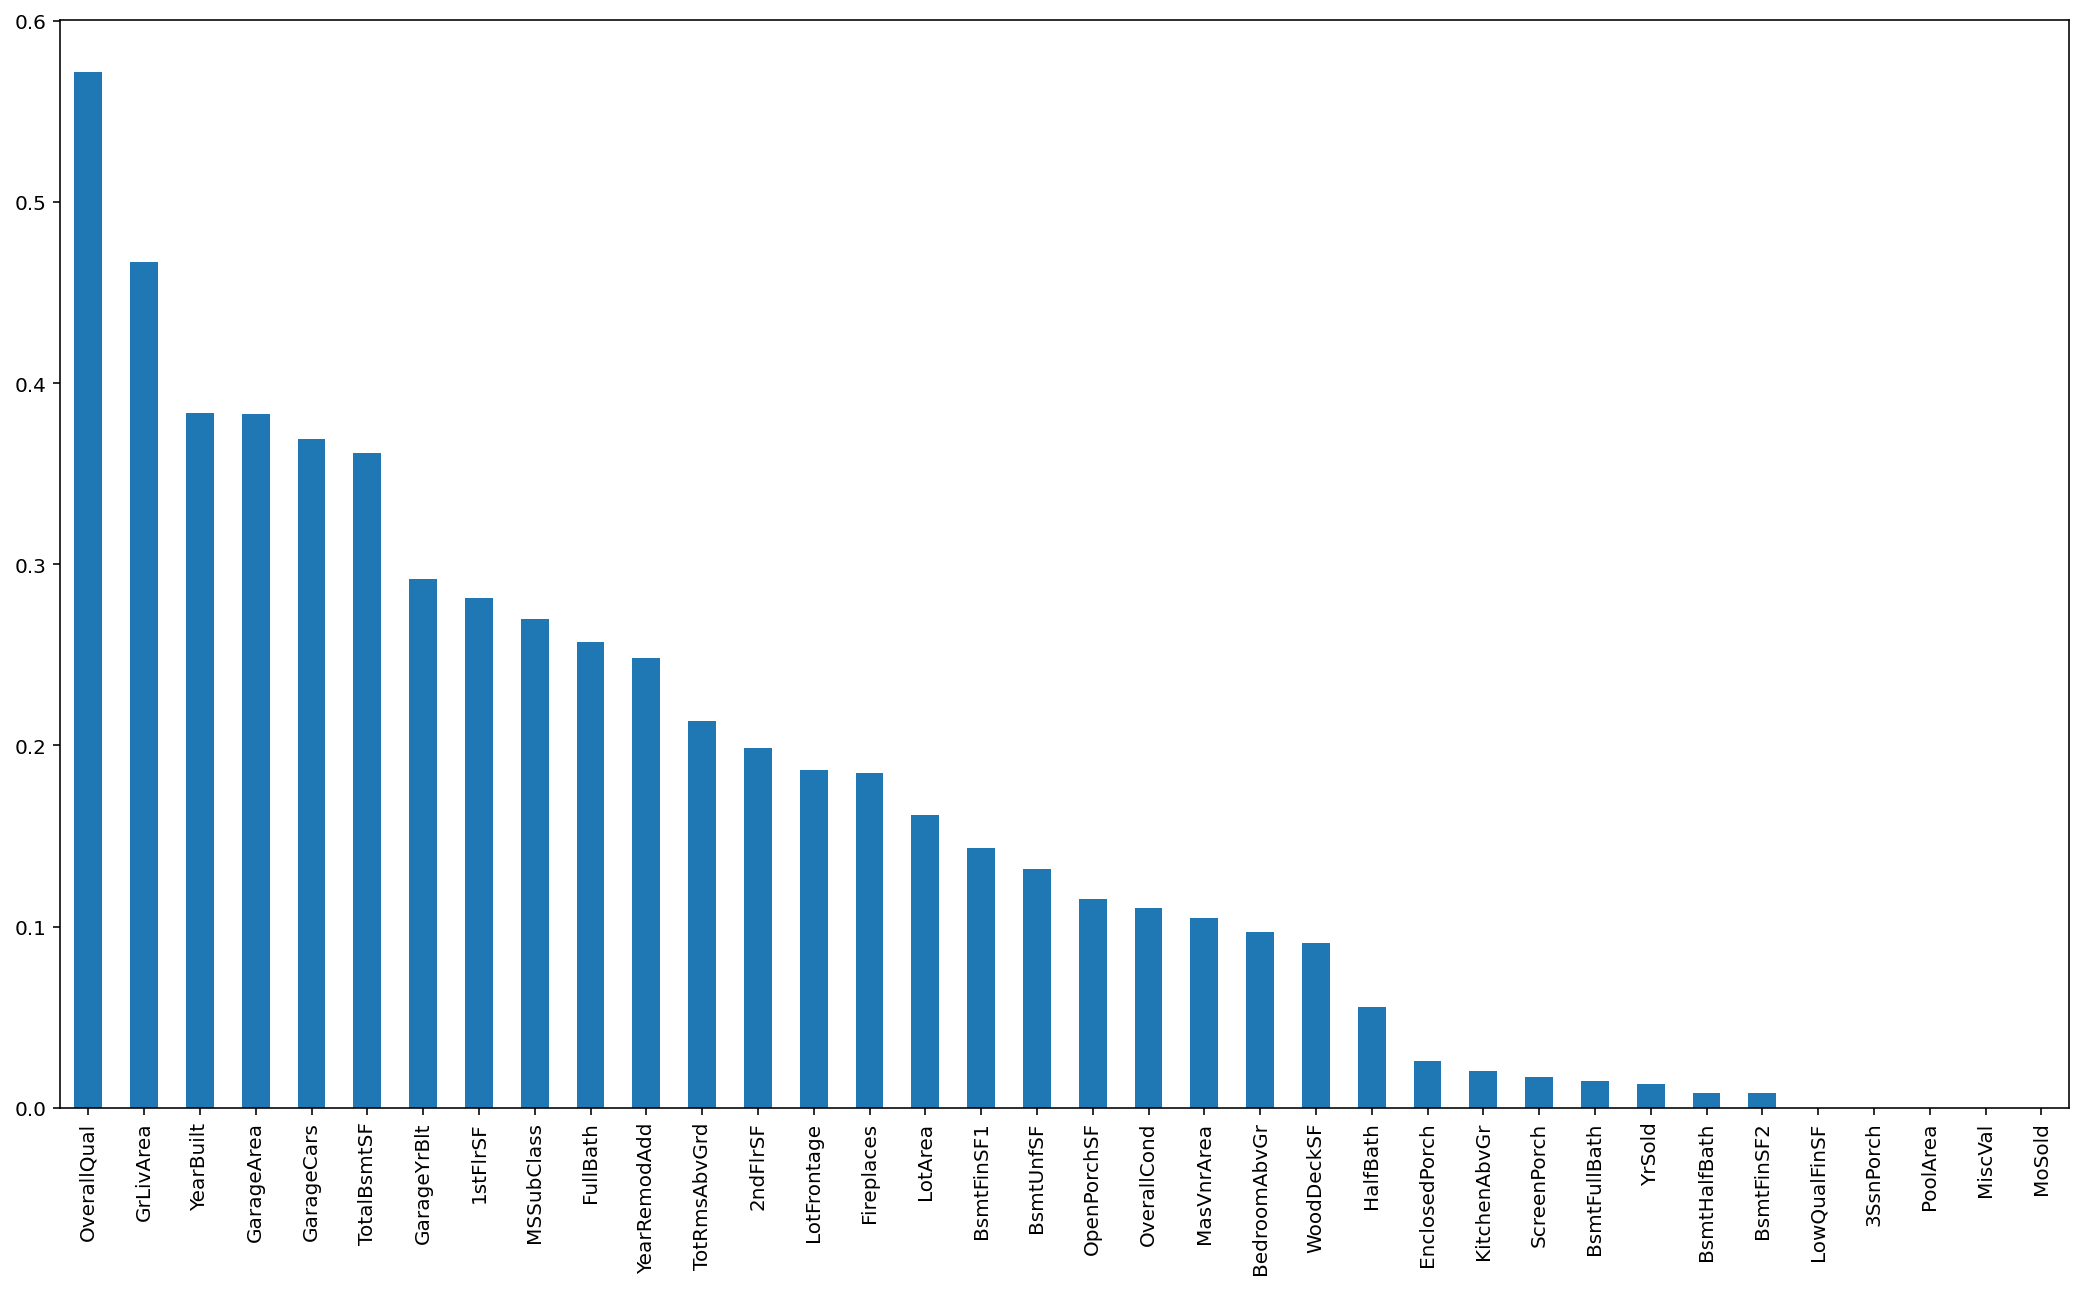

In [40]:
mutual_reg.sort_values(ascending=False).plot.bar(figsize=(18,10))

In [41]:
from sklearn.feature_selection import SelectPercentile
#Selecting top 20 percentile
selected_top_features = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_features.fit(x_train.fillna(0),y_train)
selected_top_features.get_support()

array([False, False, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False])

In [42]:
x_train.columns[selected_top_features.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

#### 4.Chi Square Test for Feature Selection

In [79]:
df_titanic= pd.read_csv('titanic_train.csv')
df_titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [80]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [81]:
df = df_titanic[['Sex', 'Pclass', 'Survived', 'Embarked']]
df.tail()

,Sex,Pclass,Survived,Embarked
886,male,2,0,S
887,female,1,1,S
888,female,3,0,S
889,male,1,1,C
890,male,3,0,Q


In [82]:
df['Sex'] = np.where(df.Sex=='male',1,0)
df['Sex']

<ipython-input-82-36a46a00a5b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = np.where(df.Sex=='male',1,0)


0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [83]:
ordinal_label = {k:i for i,k in enumerate(df.Embarked.unique(),0)}
df['Embarked'] = df.Embarked.map(ordinal_label)
df.Embarked

<ipython-input-83-82e931b59787>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Embarked'] = df.Embarked.map(ordinal_label)


0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    2
Name: Embarked, Length: 891, dtype: int64

In [84]:
cond = np.random.rand(len(df))>0.3
train = np.where(cond)[0]
test = np.where(~cond)[0]
x_train = df.iloc[train]
x_test = df.iloc[test]
y_train = x_train.Survived
x_train = x_train.drop('Survived', axis=1)
y_test = x_test.Survived
x_test = x_test.drop('Survived', axis=1)
len(x_train), len(x_test)

(610, 281)

In [85]:
from sklearn.feature_selection import chi2
f_p_values = chi2(x_train,y_train)
f_p_values

(array([68.21476266, 19.7386571 , 19.41260948]),
 array([1.46623915e-16, 8.87870907e-06, 1.05309452e-05]))

In [87]:
p_series = pd.Series(f_p_values[1])
p_series.index = x_train.columns
p_series.sort_values(ascending=False)

Embarked    1.053095e-05
Pclass      8.878709e-06
Sex         1.466239e-16
dtype: float64

### Sex column is the most important column of all categorical for Survival